In [89]:
import pandas as pd
from statistics import mean

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

In [90]:
df = pd.read_csv('salary.csv')
df.head()

,exp,salary
0,7,7187
1,1,1002
2,0,485
3,8,8930
4,14,14926


In [91]:
df.describe()

,exp,salary
count,500.000000,500.000000
mean,6.960000,7442.346000
std,4.272107,4289.957043
min,0.000000,2.000000
25%,3.000000,3674.750000
50%,7.000000,7471.500000
75%,11.000000,11031.250000
max,14.000000,14995.000000


In [92]:
df.columns, df.salary.dtype

(Index(['exp', 'salary'], dtype='object'), dtype('int64'))

In [93]:
xs, ys = df['exp'], df['salary']

In [94]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(xs, ys)
r

0.9976033923606045

In [95]:
covariance = ((mean(xs) * mean(ys)) - mean(xs*ys))
variance = ((mean(xs) **2) - mean(xs**2))
m = ( covariance / variance )
b = mean(ys) - m*mean(xs)

In [96]:
regression_line = [(m*x)+b for x in xs]

In [97]:
predict_x = 8
predict_y = (m*predict_x)+b
predict_x, predict_y

(8, 8484.18841883345)

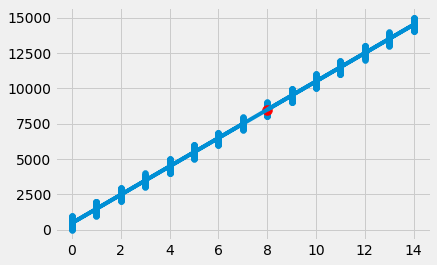

In [98]:
plt.scatter(xs, ys)
plt.scatter(predict_x, predict_y, s=100, color='r')

plt.plot(xs, regression_line)
plt.show()

In [99]:
xs = xs.to_numpy().reshape((-1, 1))
ys = ys.to_numpy().reshape((-1, 1))

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.33)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [101]:
# lr.predict(X_test) 
lr.score(X_test, y_test)

0.9949570750032797

In [103]:
lr.intercept_, lr.coef_

(array([477.3669965]), array([[1000.24446845]]))

In [102]:
sal_df = pd.read_csv('SF Salaries Data/Salaries.csv')
sal_df.describe()

/Users/lakpa/.pyenv/versions/3.6.15/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,4,5,6,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [49]:
sal_df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [48]:
sal_df.loc[ sal_df['TotalPay'] == sal_df['TotalPay'].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sal_df[''], ys, test_size=0.33, random_state=42)

ValueError: Expected 2D array, got 1D array instead:
array=[ 5 12 14  8  9  9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

567595.43